In [11]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
data=pd.read_csv("Attrition.data.csv")


In [28]:
data.head(20)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,Upto 5k,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,Female,70,3,1,Sales Representative,4,Single,1569,Upto 5k,18420,1,Y,Yes,12,3,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,Upto 5k,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,4,Male,50,3,1,Sales Representative,3,Single,1675,Upto 5k,26820,1,Y,Yes,19,3,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,2,Female,79,3,1,Laboratory Technician,2,Single,1483,Upto 5k,16102,1,Y,No,14,3,4,80,0,1,3,3,1,0,0,0.0


In [29]:
data.dtypes


EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [30]:
data.info

<bound method DataFrame.info of        EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development                 3     

# Data Cleaning

In [31]:
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [32]:
data.dropna(how='any')

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5,Y,No,11,3,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,3,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4,Y,No,19,3,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,1,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8,Y,No,14,3,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,2,Male,52,4,2,Sales Executive,4,Divorced,5220,5k-10k,10893,0,Y,Yes,18,3,2,80,1,12,3,3,11,7,1,9.0


Analysis

In [33]:
age_att=data.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

Observation As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

In [34]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

Observation As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line

In [36]:
dept_att=data.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(dept_att,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

Observations This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

In [37]:
sats_att=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

Observation In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

In [38]:
jsats_att=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

Observation With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

In [40]:
stock_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

Observation The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

In [41]:
wlb_att=data.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(wlb_att,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

Observation People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

# How does work experience affect attrition?

In [42]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

Observations As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

# How does Work duration in current role impact Attrition?


In [43]:
yrscr_att=data.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(yrscr_att,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

Observation We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

In [44]:
hike_att=data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

Observation Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

In [45]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

Observation We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change. When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

<AxesSubplot:>

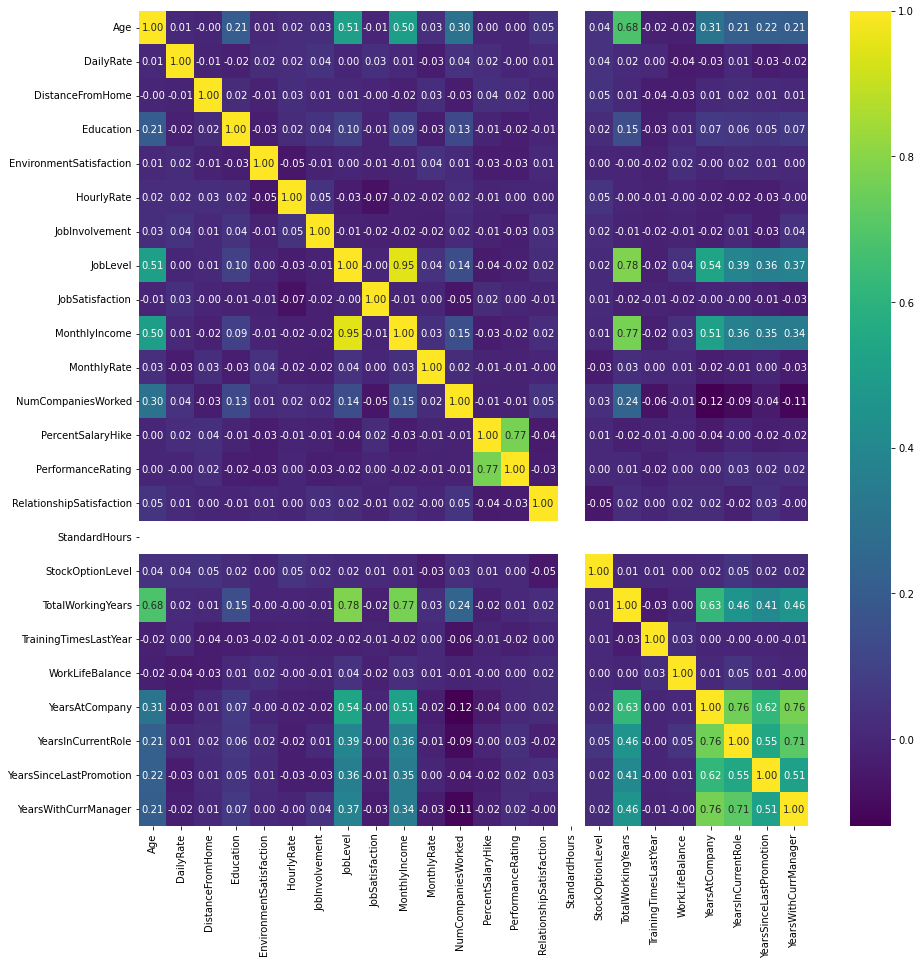

In [46]:
X=data[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=data[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')

# Summary

We have checked the data, and have come upon to infer the following observations:



1.People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.

Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.
Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.
Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (For e.g. Human Resources)
People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.

Some highlights on the data:



1.Cleanest data source I have seen till date. Kudos to the creator. It was very easy to start the analysis.

2.The data is not very extended. Only 3 departments have been presented. It would be better to have some more departments- and some information regarding other organization to study the pattern more distinctly